<a href="https://colab.research.google.com/github/Aayush452-cell/Machine-Learning-Models/blob/master/Malaria_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D

In [3]:
from tensorflow.keras.models import Model

In [4]:
from tensorflow.keras.applications.vgg19 import VGG19

In [5]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [6]:
from keras.preprocessing import image


In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from keras.models import Sequential

In [9]:
import numpy as np

In [10]:
from glob import glob

In [11]:
import matplotlib.pyplot as plt

In [12]:
Image_Size=[224,224]

In [13]:
train_path='/content/drive/My Drive/Dataset/Train'
test_path='/content/drive/My Drive/Dataset/Test'

In [14]:
vgg=VGG19(input_shape=Image_Size+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 2s 0us/step


In [15]:
for layers in vgg.layers:
    layers.trainable=False

In [18]:
folder=glob('/content/drive/My Drive/Dataset/Train/*')

In [19]:
folder

['/content/drive/My Drive/Dataset/Train/Uninfected',
 '/content/drive/My Drive/Dataset/Train/Parasite']

In [20]:
x=Flatten()(vgg.output)

In [21]:
prediction=Dense(len(folder),activation='softmax')(x)

In [22]:
model=Model(inputs=vgg.input,outputs=prediction)

In [23]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [34]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [35]:
train_data=test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [30]:
test_data=test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [32]:
r=model.fit_generator(train_data,validation_data=test_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(test_data))

Epoch 1/5
13/13 [==============================] - 5s 357ms/step - loss: 0.1927 - accuracy: 0.9423 - val_loss: 0.3579 - val_accuracy: 0.8507
Epoch 2/5
13/13 [==============================] - 4s 341ms/step - loss: 0.1650 - accuracy: 0.9688 - val_loss: 0.3219 - val_accuracy: 0.8582
Epoch 3/5
13/13 [==============================] - 4s 343ms/step - loss: 0.1458 - accuracy: 0.9712 - val_loss: 0.3337 - val_accuracy: 0.8806
Epoch 4/5
13/13 [==============================] - 4s 341ms/step - loss: 0.1308 - accuracy: 0.9784 - val_loss: 0.3271 - val_accuracy: 0.8657
Epoch 5/5
13/13 [==============================] - 4s 342ms/step - loss: 0.1292 - accuracy: 0.9784 - val_loss: 0.2990 - val_accuracy: 0.8507


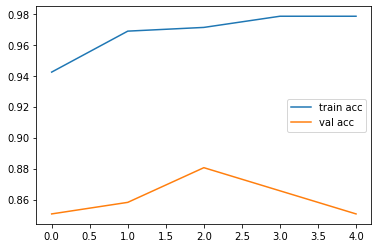

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf
from keras.models import load_model
model.save('malaria_model_vgg19.h5')